### BEST PROMPTS


candidate_labels=["detailed", "not detailed"],
hypothesis_template="This text is {} in terms of visual details of characters, setting, or environment.",

#### Table 1: Prompt Configurations and Best Scores

| ID | Hypothesis Template | Candidate Labels | Best Score |
|----|---------------------|------------------|------------|
| P1 | This text is {} in terms of visual details of characters, setting, or environment. | detailed, not detailed | 0.6750 |
| P2 | This text {} | can be easily visualized with specific sensory details, is difficult to visualize or abstract | 0.4210 |
| P3 | This text is {} in terms of sensory details, imagery, characters, environment, and vivid descriptions. | visual, not visual | 0.3074 |
| P4 | This text is {} in terms of sensory details, imagery, characters, and vivid descriptions of foreground and background. | visual, non_visual | 0.3145 |
| P5 | This text is {} in terms of sensory details, imagery, characters, environment, and vivid descriptions of foreground and background. | visual, non_visual | 0.3262 |
| P6 | This text is {} in terms of visual details of characters, setting, or environment. | descriptive, non_descriptive | 0.2956 |
| P7 | I {} that the text is visual in terms of sensory details, imagery, and vivid descriptions. | disagree, agree, strongly agree | 0.1135 |
| P8 | This text is {} in terms of visual details of characters, setting, or environment. | visual, non_visual | 0.2000 |
| P9 | This text is {} in terms of sensory details, imagery, and vivid descriptions. | descriptive, non_descriptive | 0.1388 |
| P10 | This text is {} in terms of sensory details, imagery, and vivid descriptions. | visual, non_visual | 0.3463 |
| P11 | This text is {} in terms of sensory details, imagery, and vivid descriptions. | detailed, not_detailed | 0.2932 |
| P12 | This passage depicts {} | 'This text contains no visual imagery', 'This text describes a simple object, body part, or animal', 'This text describes a simple object or person in action', 'This text describes a detailed object, place, or identifiable character', 'This text describes a detailed place or character performing an action', 'This text describes a complete scene or detailed face', 'This text describes a complete scene with action or movement', 'This text describes a rich scene with multiple visual elements including character, setting, and details', 'This text describes a rich scene with multiple visual elements and dynamic action', 'This text vividly depicts a full scene with background, foreground, atmospheric details, and time of day' | 0.1410 |
| P13 | The visual richness of this text shows {} | 'no visual description', 'a basic visible object or person', 'a basic object or person doing something', 'a detailed location, object, or recognizable character', 'a detailed place or character in motion', 'a scene with face details or minimal setting', 'a scene with setting and action', 'a rich visual scene with character, setting, and descriptive details', 'a rich visual scene with multiple elements in motion', 'a vivid, complete scene with atmosphere, lighting, and layered visual information' | 0.0101 |
| P14 | The level of visual description in this text is: {} | 'zero visual imagery', 'minimal visual content - single simple element', 'low visual detail - simple element with action', 'moderate visual content - detailed element or basic character', 'moderate visual scene - setting with action', 'good visual description - complete scene or detailed character', 'rich visual scene - setting with movement and details', 'very rich visual scene - multiple described elements and context', 'vivid dynamic scene - rich setting with action and details', 'fully immersive visual scene - atmospheric, layered, cinematic description' | 0.1589 |
| P15 | This text {} | contains vivid visual description with multiple specific details, contains minimal or no visual description | 0.2469 |
| P16 | This text {} | describes a visually complete scene with setting and details, describes abstract concepts without visual imagery | 0.2814 |
| P17 | This text {} | provides rich visual description of people, places, or objects, provides little visual description | 0.1072 |

#### Table 2: Model Performance Comparison

| Model | Time | P1 Score | P2 Score |
|-------|------|----------|----------|
| deberta | 5:45 | 0.3851 | 0.3429 |
| bart-large | 11:06 | 0.3500 | 0.2760 |
| MoritzLaurer/ModernBERT-large-zeroshot-v2.0 | 18:38 | 0.4860 | 0.4210 |
| MoritzLaurer/deberta-v3-large-zeroshot-v2.0 | 21:09 | 0.5100 | 0.3870 |
| MoritzLaurer/deberta-v3-base-zeroshot-v2.0 | 8:44 | 0.4960 | 0.2450 |
| MoritzLaurer/roberta-large-zeroshot-v2.0-c | 16:48 | 0.5780 | 0.2390 |
| MoritzLaurer/roberta-base-zeroshot-v2.0-c | 21:43 | 0.6750 | 0.1994 |

### Setup

In [ ]:
import numpy as np
from pathlib import Path
import sys

sys.path.append(str(Path.cwd().parent.parent))

from models.nli.common import METRICS_DIR, DATA_DIR

from evaluation.nli.helpers import (
    prepare_nli_tables,
    load_metric_files,
    create_table_b_styler,
    MODEL_NAME_MAP,
    plot_correlation_matrix,
    plot_calibration_comparison,
    run_cv_comparison,
    Q2QCalibration,
    IsotonicCalibration,
    load_train_test_data,
    to_model_score_data,
)

### Tables

In [3]:
SELECTED_DIR = METRICS_DIR / "underscore-study"
files = sorted(SELECTED_DIR.glob("nli_*.json"))
items = load_metric_files(files)

# Clean, simple notebook code
df_a, latex_a, df_b, latex_b, bold_cols = prepare_nli_tables(items)

# Display Table A
display(
    df_a.style.format(
        precision=4, subset=[c for c in df_a.columns if c != "Rank"]
    ).hide(axis="index")
)
print(latex_a)

# Display Table B with all styling/highlighting built-in
styler = create_table_b_styler(df_b, bold_cols)
display(styler)
print(latex_b)

Rank,Hypothesis Template,Candidate Labels,Best Score
1,"This text is {} in terms of visual details of characters, setting, or environment.","not detailed, detailed",0.8388
2,"This text is {} in terms of visual details of characters, setting, or environment.","not descriptive, descriptive",0.8255
3,"This text is {} in terms of visual details of characters, setting, or environment.","not_detailed, detailed",0.8174
4,"This text is {} in terms of visual details of characters, setting, or environment.","not_descriptive, descriptive",0.8029
5,"This text is {} in terms of sensory details, imagery, characters, environment, and vivid descriptions.","not visual, visual",0.7313
6,"This text is {} in terms of sensory details, imagery, characters, environment, and vivid descriptions.","not_visual, visual",0.6970


\begin{tabular}{lrrr}
\hline
 Rank & Hypothesis Template & Candidate Labels & Best Score \\
\hline
 1 & This text is \\textbackslash{}{\\textbackslash{}} in terms of visual details of characters, setting, or environment. & not detailed, detailed & 0.8388 \\
 2 & This text is \\textbackslash{}{\\textbackslash{}} in terms of visual details of characters, setting, or environment. & not descriptive, descriptive & 0.8255 \\
 3 & This text is \\textbackslash{}{\\textbackslash{}} in terms of visual details of characters, setting, or environment. & not\\textbackslash{}_detailed, detailed & 0.8174 \\
 4 & This text is \\textbackslash{}{\\textbackslash{}} in terms of visual details of characters, setting, or environment. & not\\textbackslash{}_descriptive, descriptive & 0.8029 \\
 5 & This text is \\textbackslash{}{\\textbackslash{}} in terms of sensory details, imagery, characters, environment, and vivid descriptions. & not visual, visual & 0.7313 \\
 6 & This text is \\textbackslash{}{\\textba

Rank,RoBERTa Corr,ModernBERT-Large Corr,DeBERTaV3-Large Corr,RoBERTa Throughput,ModernBERT-Large Throughput,DeBERTaV3-Large Throughput
1,0.8388,0.7420,0.5542,9.2260,1.7878,1.5660
2,0.8255,0.7518,0.5415,7.8477,2.2146,1.7841
3,0.8174,0.7099,0.5174,6.2792,1.6678,1.4174
4,0.8029,0.7498,0.5192,9.0919,2.0857,2.0027
5,0.7313,0.7032,0.6235,6.5655,1.7603,1.5135
6,0.6970,0.6658,0.6624,7.7123,1.8256,1.6429
AVG,0.7855,0.7204,0.5697,7.7871,1.8903,1.6544


\begin{tabular}{lrrrrrr}
\hline
 Rank & RoBERTa Corr & ModernBERT-Large Corr & DeBERTaV3-Large Corr & RoBERTa Throughput & ModernBERT-Large Throughput & DeBERTaV3-Large Throughput \\
\hline
 1 & \textbf{0.8388} & 0.7420 & 0.5542 & \textbf{9.2260} & 1.7878 & 1.5660 \\
 2 & 0.8255 & \textbf{0.7518} & 0.5415 & 7.8477 & \textbf{2.2146} & 1.7841 \\
 3 & 0.8174 & 0.7099 & 0.5174 & 6.2792 & 1.6678 & 1.4174 \\
 4 & 0.8029 & 0.7498 & 0.5192 & 9.0919 & 2.0857 & \textbf{2.0027} \\
 5 & 0.7313 & 0.7032 & 0.6235 & 6.5655 & 1.7603 & 1.5135 \\
 6 & 0.6970 & 0.6658 & \textbf{0.6624} & 7.7123 & 1.8256 & 1.6429 \\
 AVG & 0.7855 & 0.7204 & 0.5697 & 7.7871 & 1.8903 & 1.6544 \\
\hline
\end{tabular}


### Correlation Matrix


Using configuration 1 of 6


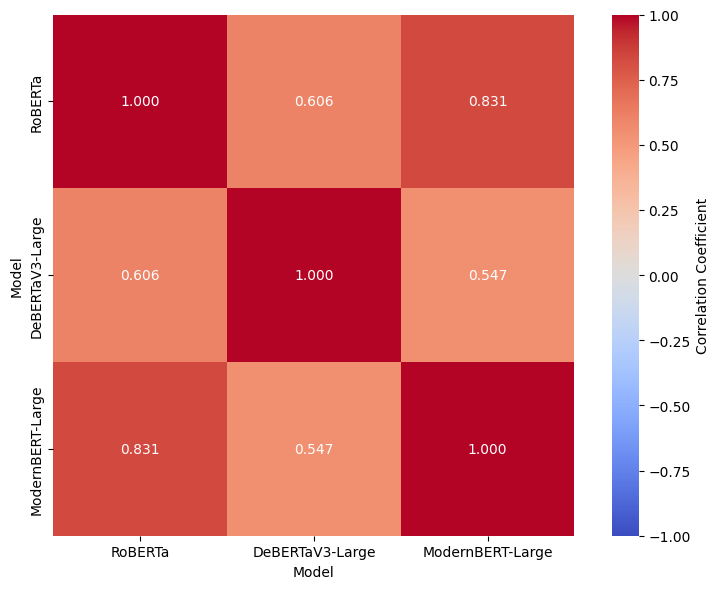

Correlation coefficients:
                   RoBERTa  DeBERTaV3-Large  ModernBERT-Large
RoBERTa           1.000000         0.605694          0.831123
DeBERTaV3-Large   0.605694         1.000000          0.547232
ModernBERT-Large  0.831123         0.547232          1.000000


In [4]:
CONFIG_IDX = 0
print(f"Using configuration {CONFIG_IDX + 1} of {len(items)}")
item = items[CONFIG_IDX] if items else {}
models = item.get("models", [])
names = [m.get("model_name", "") for m in models if m.get("scores") is not None]
score_vectors = [
    np.asarray(m.get("scores", []), dtype=float)
    for m in models
    if m.get("scores") is not None
]
pretty_names = [MODEL_NAME_MAP.get(n, n) for n in names]
plot_correlation_matrix(score_vectors, pretty_names)

### Calibration Mapping


#### Cross-Validation Comparison: Isotonic vs Q2Q

In [6]:
SELECTED_DIR = METRICS_DIR
files = sorted(SELECTED_DIR.glob("nli_train*.json"))
items = load_metric_files(files)

FILE_IDX = 0
MODEL_IDX = 0

df_train, df_test = load_train_test_data(DATA_DIR)
score_data = to_model_score_data(items, df_train, df_test)

sd = score_data[0] if score_data else None
if sd is None:
    raise RuntimeError("No score data available for CV comparison")

results_df = run_cv_comparison(sd.train_scores, sd.y_train)
print(results_df.to_string(index=False))

  Method  Mean RMSE  Std RMSE  Mean Accuracy  Std Accuracy
Isotonic   0.911326  0.065910       0.431321      0.037675
     Q2Q   1.001659  0.071671       0.476988      0.019297


#### Isotonic vs Q2Q visualization

Selected model: richardr1126/roberta-base-zeroshot-v2.0-c-ONNX
Train scores: (392,) values


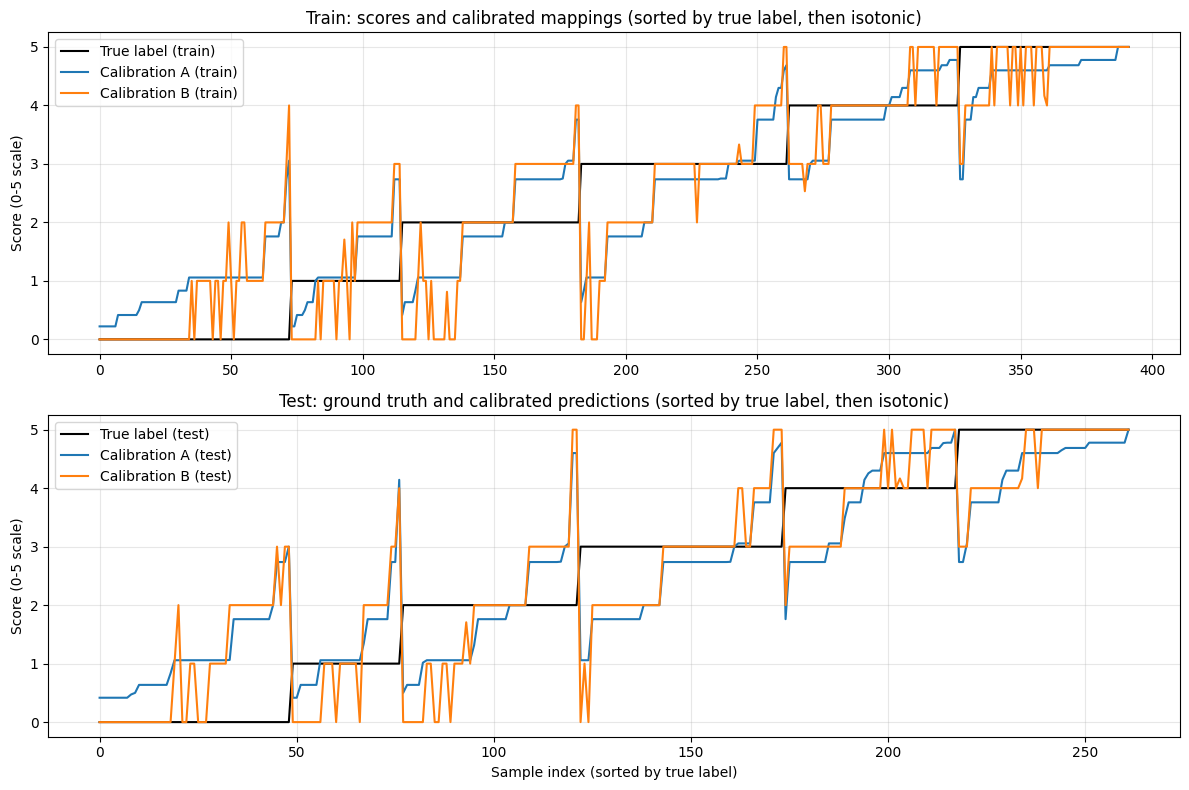

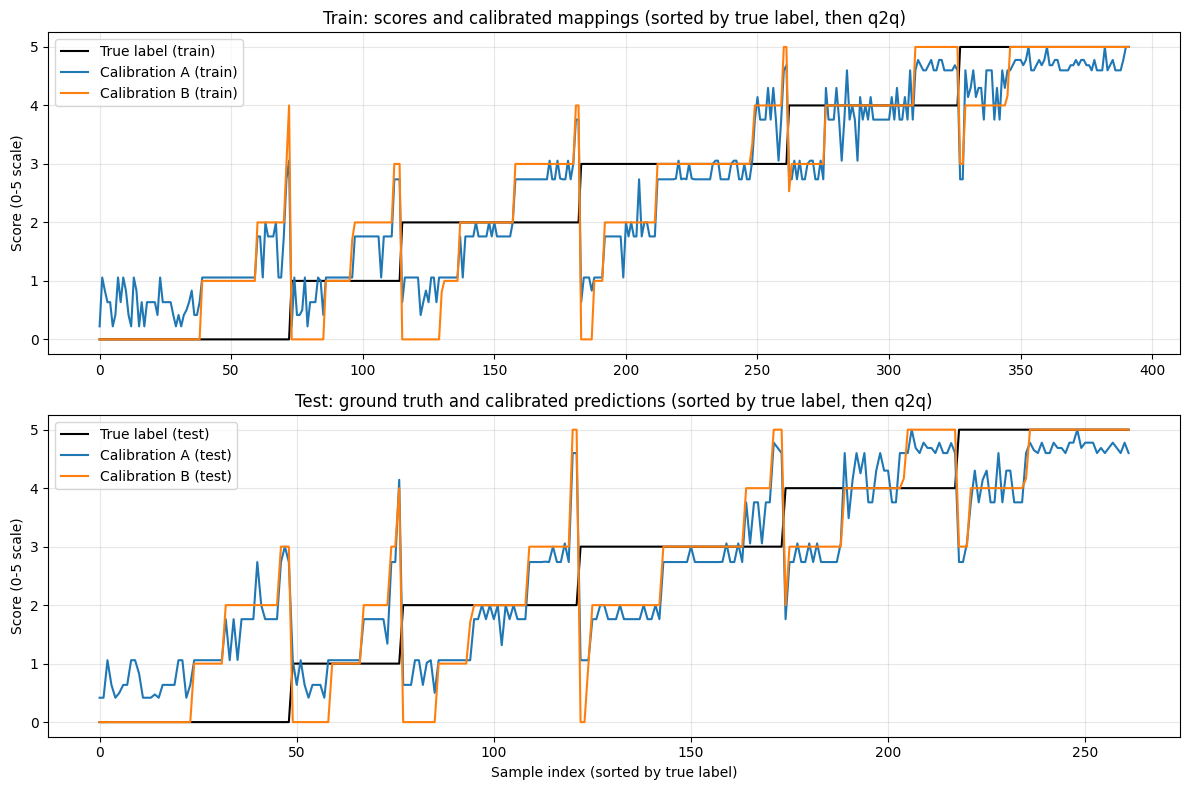

In [7]:
FILE_IDX = 0
MODEL_IDX = 0

df_train, df_test = load_train_test_data(DATA_DIR)
test_files = sorted(SELECTED_DIR.glob("nli_test_*.json"))
items_test = load_metric_files(test_files) if test_files else []

items_train = items  # from earlier cell
score_data = to_model_score_data(items_train, df_train, df_test, items_test)
sd = score_data[0] if score_data else None
if sd is None:
    raise RuntimeError("No score data available for calibration visualization")

print(f"Selected model: {sd.model_name}")
print(f"Train scores: {sd.train_scores.shape} values")

iso = IsotonicCalibration()
q2q = Q2QCalibration()

iso_cal = iso.fit(sd.train_scores, sd.y_train)
q2q_cal = q2q.fit(sd.train_scores, sd.y_train)

iso_train_pred = iso_cal.predict(sd.train_scores)
q2q_train_pred = q2q_cal.predict(sd.train_scores)

iso_test_pred = iso_cal.predict(sd.test_scores) if sd.test_scores is not None else None
q2q_test_pred = q2q_cal.predict(sd.test_scores) if sd.test_scores is not None else None


def _align_and_sort_local(scores, labels, a_pred, b_pred, sort_by_b=False):
    min_len = min(len(scores), len(labels), len(a_pred), len(b_pred))
    scores_aligned = scores[:min_len]
    labels_aligned = labels[:min_len]
    a_pred_aligned = a_pred[:min_len]
    b_pred_aligned = b_pred[:min_len]
    secondary = b_pred_aligned if sort_by_b else a_pred_aligned
    order = np.lexsort((secondary, labels_aligned))
    return (
        scores_aligned[order],
        labels_aligned[order],
        a_pred_aligned[order],
        b_pred_aligned[order],
    )


train_scores_sorted, y_train_sorted, iso_train_sorted, q2q_train_sorted = (
    _align_and_sort_local(
        sd.train_scores, sd.y_train, iso_train_pred, q2q_train_pred, sort_by_b=False
    )
)

if sd.y_test is not None and iso_test_pred is not None and q2q_test_pred is not None:
    _, y_test_sorted, iso_test_sorted, q2q_test_sorted = _align_and_sort_local(
        sd.test_scores, sd.y_test, iso_test_pred, q2q_test_pred, sort_by_b=False
    )
else:
    y_test_sorted = iso_test_sorted = q2q_test_sorted = None

plot_calibration_comparison(
    train_scores_sorted,
    y_train_sorted,
    iso_train_sorted,
    q2q_train_sorted,
    y_test_sorted,
    iso_test_sorted,
    q2q_test_sorted,
    title_suffix=" (sorted by true label, then isotonic)",
)

if sd.y_test is not None and iso_test_pred is not None and q2q_test_pred is not None:
    (
        train_scores_sorted_q2q,
        y_train_sorted_q2q,
        iso_train_sorted_q2q,
        q2q_train_sorted_q2q,
    ) = _align_and_sort_local(
        sd.train_scores, sd.y_train, iso_train_pred, q2q_train_pred, sort_by_b=True
    )
    _, y_test_sorted_q2q, iso_test_sorted_q2q, q2q_test_sorted_q2q = (
        _align_and_sort_local(
            sd.test_scores, sd.y_test, iso_test_pred, q2q_test_pred, sort_by_b=True
        )
    )

    plot_calibration_comparison(
        train_scores_sorted_q2q,
        y_train_sorted_q2q,
        iso_train_sorted_q2q,
        q2q_train_sorted_q2q,
        y_test_sorted_q2q,
        iso_test_sorted_q2q,
        q2q_test_sorted_q2q,
        title_suffix=" (sorted by true label, then q2q)",
    )